<a href="https://colab.research.google.com/github/aarsh1729/ml-theory-and-projects/blob/main/Copy_of_tensor_flow_course_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
scalar = tf.constant(7)
print(scalar.ndim)
vector = tf.constant([10, 10])
print(vector.ndim)
matrix = tf.constant([[10, 7],
                      [7, 10]])
print(matrix.ndim)
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]])# this will have same dim as previous matrix as no. of elements in array is same
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
print(tensor.ndim)

0
1
2
3


In [ ]:
changeable_tensor = tf.Variable([10, 7])# variables are mutable
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors?

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

In [ ]:
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>


Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled,seed = 42)
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
#all these are very similar to numpy cmds just very faster
tf.ones(shape=(3, 2))
tf.zeros(shape=(3, 2))
# Note: A matrix or tensor is typically represented by a capital letter (e.g. X or A) where as a vector is typically represented by a lowercase letter (e.g. y or b).


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

Shape: The length (number of elements) of each of the dimensions of a tensor.
Rank: The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.
Axis or Dimension: A particular dimension of a tensor.
Size: The total number of items in the tensor.

In [ ]:
# tensor operations again very similar to numpy
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10
tensor * 10
tensor - 10
tensor / 10
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)
print(tensor)
tf.matmul(tensor, tensor)# matrix multiplication or syntax tensor @ tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X @ tf.reshape(Y, shape=(2, 3))
tf.matmul(tf.transpose(X), Y)
tf.tensordot(tf.transpose(X), Y, axes=1)# yet another way matmul
# changing deault datatype of tensor
B = tf.constant([1.7, 7.4])
B = tf.cast(B, dtype=tf.float16)
B
#tf.reduce_min() - find the minimum value in a tensor.
#tf.reduce_max() - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
#tf.reduce_mean() - find the mean of all elements in a tensor.
#tf.reduce_sum() - find the sum of all elements in a tensor.
#Note: typically, each of these is under the math module, e.g. tf.math.reduce_min() but you can use the alias tf.reduce_min().
#tf.argmax() - find the position of the maximum element in a given tensor.
#G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))tf.argmin() - find the position of the minimum element in a given tensor.


tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [ ]:
import numpy as np

G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.ndim
G
tf.squeeze(G)# this converts array in single dim vector
# Create a list of indices
some_list = [0, 1, 2, 3]

# One hot encode them
tf.one_hot(some_list, depth=4)
# one hot encode changes categorical data into numerical values
#tf.square() - get the square of every value in a tensor.
#tf.sqrt() - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error).
#tf.math.log() - get the natural log of every value in a tensor (elements need to floats).
#.assign() - assign a different value to a particular index of a variable tensor.
#.add_assign() - add to an existing value and reassign it at a particular index of a variable tensor. basically like adding
@tf.function# this makes function processing faster
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

Neural network network regression

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 5.1685 - mean_absolute_error: 5.1685
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 5.0685 - mean_absolute_error: 5.0685
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 4.9642 - mean_absolute_error: 4.9642
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 4.8695 - mean_absolute_error: 4.8695
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 4.7824 - mean_absolute_error: 4.7824
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 4.7022 - mean_absolute_error: 4.7022
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 4.6363 - mean_absolute_error: 4.6363
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 4.5707 - mean_absolute_error: 4.5707
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 4.5052 - mean_absolute_error: 4.5052
Epoch 10/100
2/2 [=========

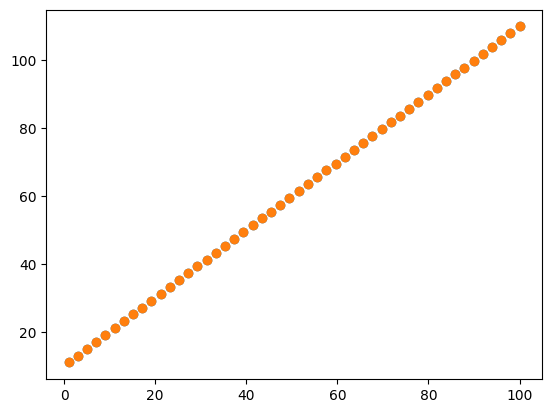

In [ ]:
# first model creation
# input data layer creation
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

X = np.linspace(1,100)
X
y = X + 10
y
#plotting
plt.scatter(X,y)

X_tens = tf.convert_to_tensor(X)
y_tens = tf.convert_to_tensor(y)
plt.scatter(X,y)

# Set random seed for basically getting the same result if anyone runs my code
tf.random.set_seed(42)

# Create a model using the Sequential API Sequential groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1]) # dense 1 means we need one prediction from one predicted value if its 2 we get two output from 1 predictor
])# input shape allow us define how many predictors we can give as input

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error most optimised solution is provided by mae and not msle or mse
              optimizer=tf.keras.optimizers.Adam(), # SGD is short for stochastic gradient descent others are Adam
              metrics=tf.keras.metrics.mae)

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # epoch is number of times the model to be trained



In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[19.489336]], dtype=float32)

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 20ms/step


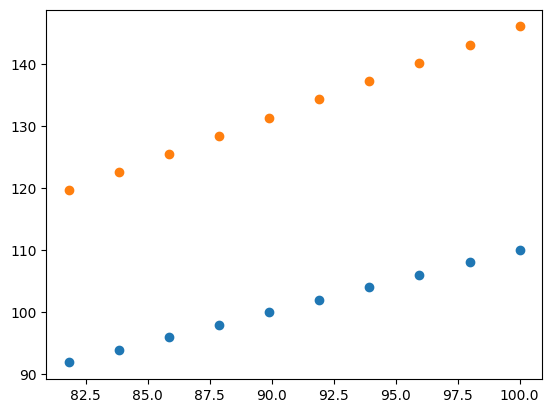

In [ ]:
import matplotlib.pyplot as plt


# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

#using previous model again

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1]) # this allows us to see the model summary
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()
model.predict([17.0])
#Total params - total number of parameters in the model.
#Trainable parameters - these are the parameters (patterns) the model can update as it trains.
#Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).


model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets outputted onto the console
# for exmample verbose = 0 direct result at =1 it shows all epoch runs

y_preds = model.predict(X_test)
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_preds)

#model.evaluate() # returns losses and metrics

#y_test, y_preds.squeeze() squeeze is used because preds dimension is different from test data

# now we improve the model by optimizing layers same dense but extra layer is added




1/1 [==============================] - 0s 49ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1)                 2         
                                                                 
 dense_57 (Dense)            (None, 1)                 2         
                                                                 
 dense_58 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


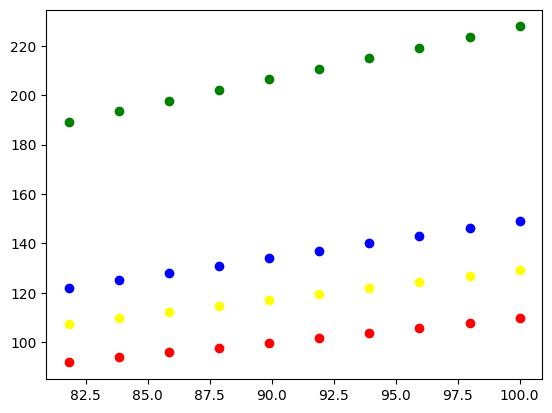

In [ ]:
# our initial model with only one layer
import matplotlib.pyplot as plt
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1])])
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100,verbose = 0)

# two extra layers

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1]), tf.keras.layers.Dense(1,input_shape=[1]),tf.keras.layers.Dense(1,input_shape=[1])])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_2.fit(X_train, y_train, epochs=1000,verbose = 0)
# changing epochs

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1]), tf.keras.layers.Dense(1,input_shape=[1])])
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_3.fit(X_train, y_train, epochs=1000, verbose = 0)

y_preds_1 = model_1.predict(X_test)
y_preds_2 = model_2.predict(X_test)
y_preds_3 = model_3.predict(X_test)
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_preds_1,color='blue')
plt.scatter(X_test,y_preds_2,color='green')
plt.scatter(X_test,y_preds_3,color='yellow')

#hence model 2 is closest
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()



In [ ]:
# working on an actual dataset

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)# remove any non categorical data before doing this
insurance_one_hot.head() # view the converted columns basically preprocessing data
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)# predictors
y = insurance_one_hot["charges"]# target label
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

# Now we can build and fit a model (we'll make it the same as model_2).


# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100,verbose = 0)

# optimizing this model

tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)


# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)


9/9 [==============================] - 0s 3ms/step - loss: 5005.2607 - mae: 5005.2607


[5005.2607421875, 5005.2607421875]

Preprocessing data (normalization and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # As seen inside the OneHotEncoder the handle_unknown parameter takes either error or ignore

)
# nrmalized data gives faster result with accurate result




## **Neural Network Classification with TensorFlow**
Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

## Creating data to view and fit
We could start by importing a classification dataset but let's practice making some of our own classification data.

🔑 Note: It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.



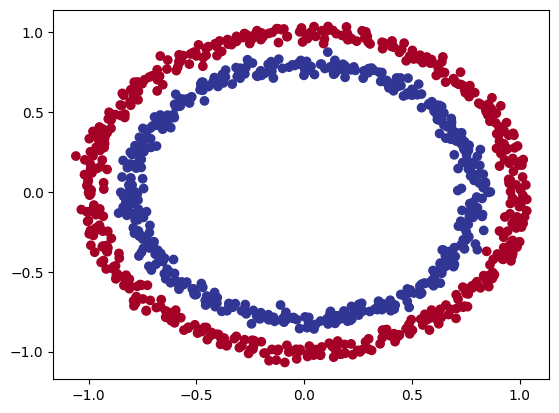

In [ ]:
# creating a toy dataset
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})# the data basically have 2 dim arrays in X and scalar in y
circles.head()
circles.label.value_counts()# only 1's and 0's hence binary classification problem
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);# we have to diffrentiate bertween blue and red circles

In [ ]:
# creating an actual model
# Set random seed
import tensorflow as tf

tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)
# 4. tuning the model as only 50 % accuracy is obtained
# A . addinglayers and more nuerons
# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=5)

# b . addind layers and increasing epochs
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1)
model_3.evaluate(X,y)

# no change in accuracy is found
# therefore visualize whts happenig behind the the scenes



Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 5.6893 - accuracy: 0.4940
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7860 - accuracy: 0.5540
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3708 - accuracy: 0.5680
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.4114 - accuracy: 0.5090
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 6.5284 - accuracy: 0.5080
Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.9783 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5060
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4710
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4880
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4800
Epoch 1/100
32/32 [===========

[0.702484130859375, 0.4970000088214874]

Text(0.5, 1.0, 'Model_7 training curves')

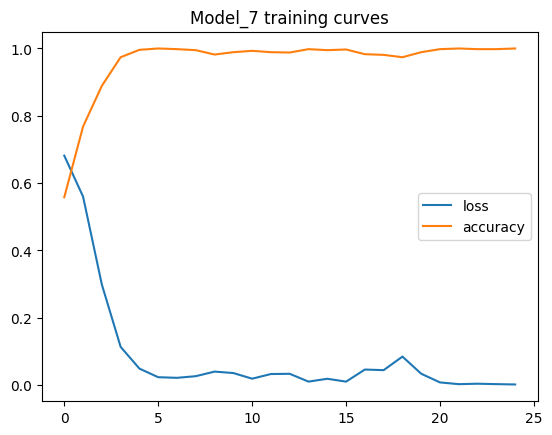

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

#plot_decision_boundary(model_3, X, y)
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
#model_5.fit(X, y, epochs=100,verbose =0)
#plot_decision_boundary(model_5, X, y)

tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=25, verbose=0)
#plot_decision_boundary(model_7, X, y)

#pd.DataFrame(history.history)# history object basically returns the outputs of epochs
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")


In [ ]:
import tensorflow as tf
import seaborn as sns
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X,
                      y,
                      epochs=100,
                      callbacks=[lr_scheduler])
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs"); # see where is loss minimum
confusion_matrix(y_test, tf.round(y_preds))# y_preds needs to be rounded off to match actual data for the confusion matrix
sns.heatmap(history.corr(),cmap='coolwarm',annot=True) # for matrix plot


NameError: ignored

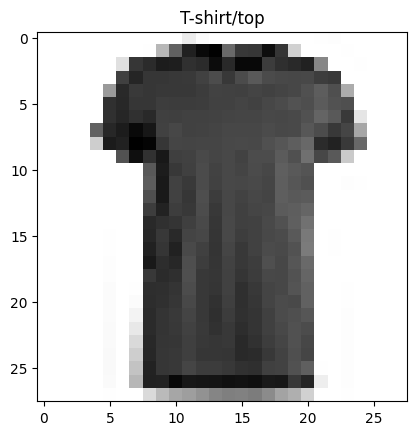

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
#print(f"Training sample:\n{train_data[0]}\n")
#print(f"Training label: {train_labels[0]}")
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape
# Check shape of a single example
train_data[0].shape, train_labels[0].shape
# Plot a single example
import matplotlib.pyplot as plt
#plt.imshow(train_data[7]);
# we now convert the labels from numerical to verbal format
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# this is based on data info in the dataset
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);



The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
The output shape will have to be 10 because we need our model to predict for 10 different classes.
We'll also change the activation parameter of our output layer to be **"softmax"** instead of 'sigmoid'.
As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use t**f.keras.losses.SparseCategoricalCrossentropy()**, if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training test data is used for validation during training





Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3835 - accuracy: 0.0985 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3024 - val_accuracy: 0.1002
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2838 - accuracy: 0.1072 - val_loss: 2.2631 - val_accuracy: 0.1211
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2030 - accuracy: 0.1408 - val_loss: 2.0855 - val_accuracy: 0.1529
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8744 - accuracy: 0.1965 - val_loss: 1.7798 - val_accuracy: 0.1923
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7576 - accuracy: 0.2186 - val_loss: 1.7110 - val_accuracy

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)
#We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

#Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).


# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# with this new data we now develop our model
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.0581 - accuracy: 0.6139 - val_loss: 0.7558 - val_accuracy: 0.7414
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7010 - accuracy: 0.7543 - val_loss: 0.7183 - val_accuracy: 0.7554
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6627 - accuracy: 0.7664 - val_loss: 0.6760 - val_accuracy: 0.7656
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6436 - accuracy: 0.7742 - val_loss: 0.6617 - val_accuracy: 0.7705
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6287 - accuracy: 0.7794 - val_loss: 0.6518 - val_accuracy: 0.7750
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6186 - accuracy: 0.7820 - val_loss: 0.6674 - val_accuracy: 0.7725
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6107 - accuracy: 0.7859 - val_loss: 0.6665 - val_accuracy

<Axes: title={'center': 'Normalized data'}>

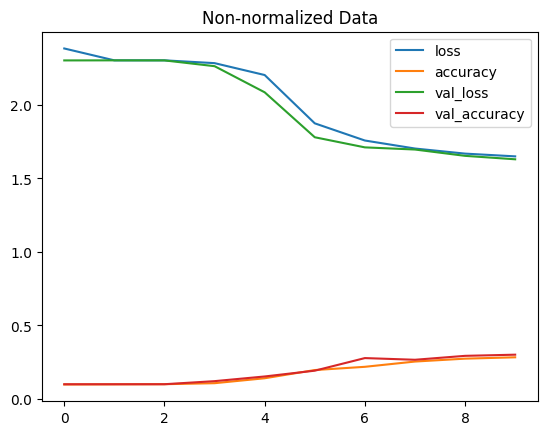

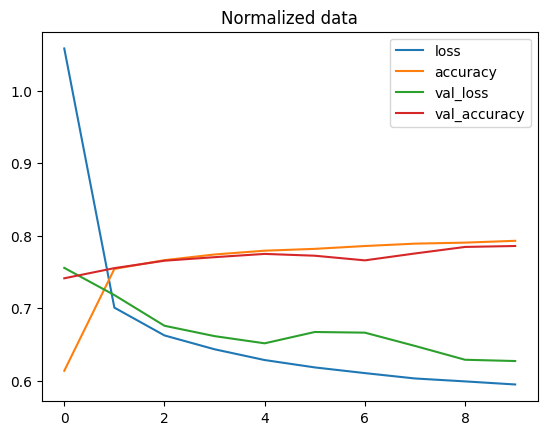

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

# much better result with normalized data

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1972 - accuracy: 0.5606 - val_loss: 0.8318 - val_accuracy: 0.6935 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7427 - accuracy: 0.7243 - val_loss: 0.7120 - val_accuracy: 0.7479 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6762 - accuracy: 0.7538 - val_loss: 0.6976 - val_accuracy: 0.7502 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6512 - accuracy: 0.7675 - val_loss: 0.6710 - val_accuracy: 0.7653 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6362 - accuracy: 0.7743 - val_loss: 0.6596 - val_accuracy: 0.7745 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6274 - accuracy: 0.7792 - val_loss: 0.6483 - val_accuracy: 0.7757 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

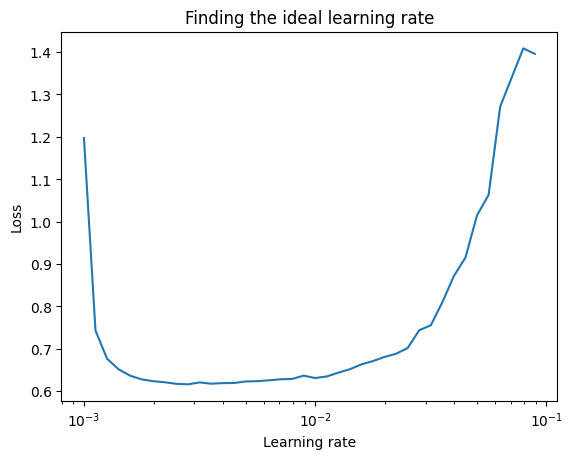

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1169 - accuracy: 0.5882 - val_loss: 0.8209 - val_accuracy: 0.6952
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7517 - accuracy: 0.7231 - val_loss: 0.7454 - val_accuracy: 0.7258
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6931 - accuracy: 0.7435 - val_loss: 0.7105 - val_accuracy: 0.7399
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6645 - accuracy: 0.7530 - val_loss: 0.6866 - val_accuracy: 0.7517
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6475 - accuracy: 0.7569 - val_loss: 0.6842 - val_accuracy: 0.7566
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6343 - accuracy: 0.7603 - val_loss: 0.6625 - val_accuracy: 0.7591
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6260 - accuracy: 0.7620 - val_loss: 0.6598 - val_accuracy

313/313 [==============================] - 1s 4ms/step


<Axes: >

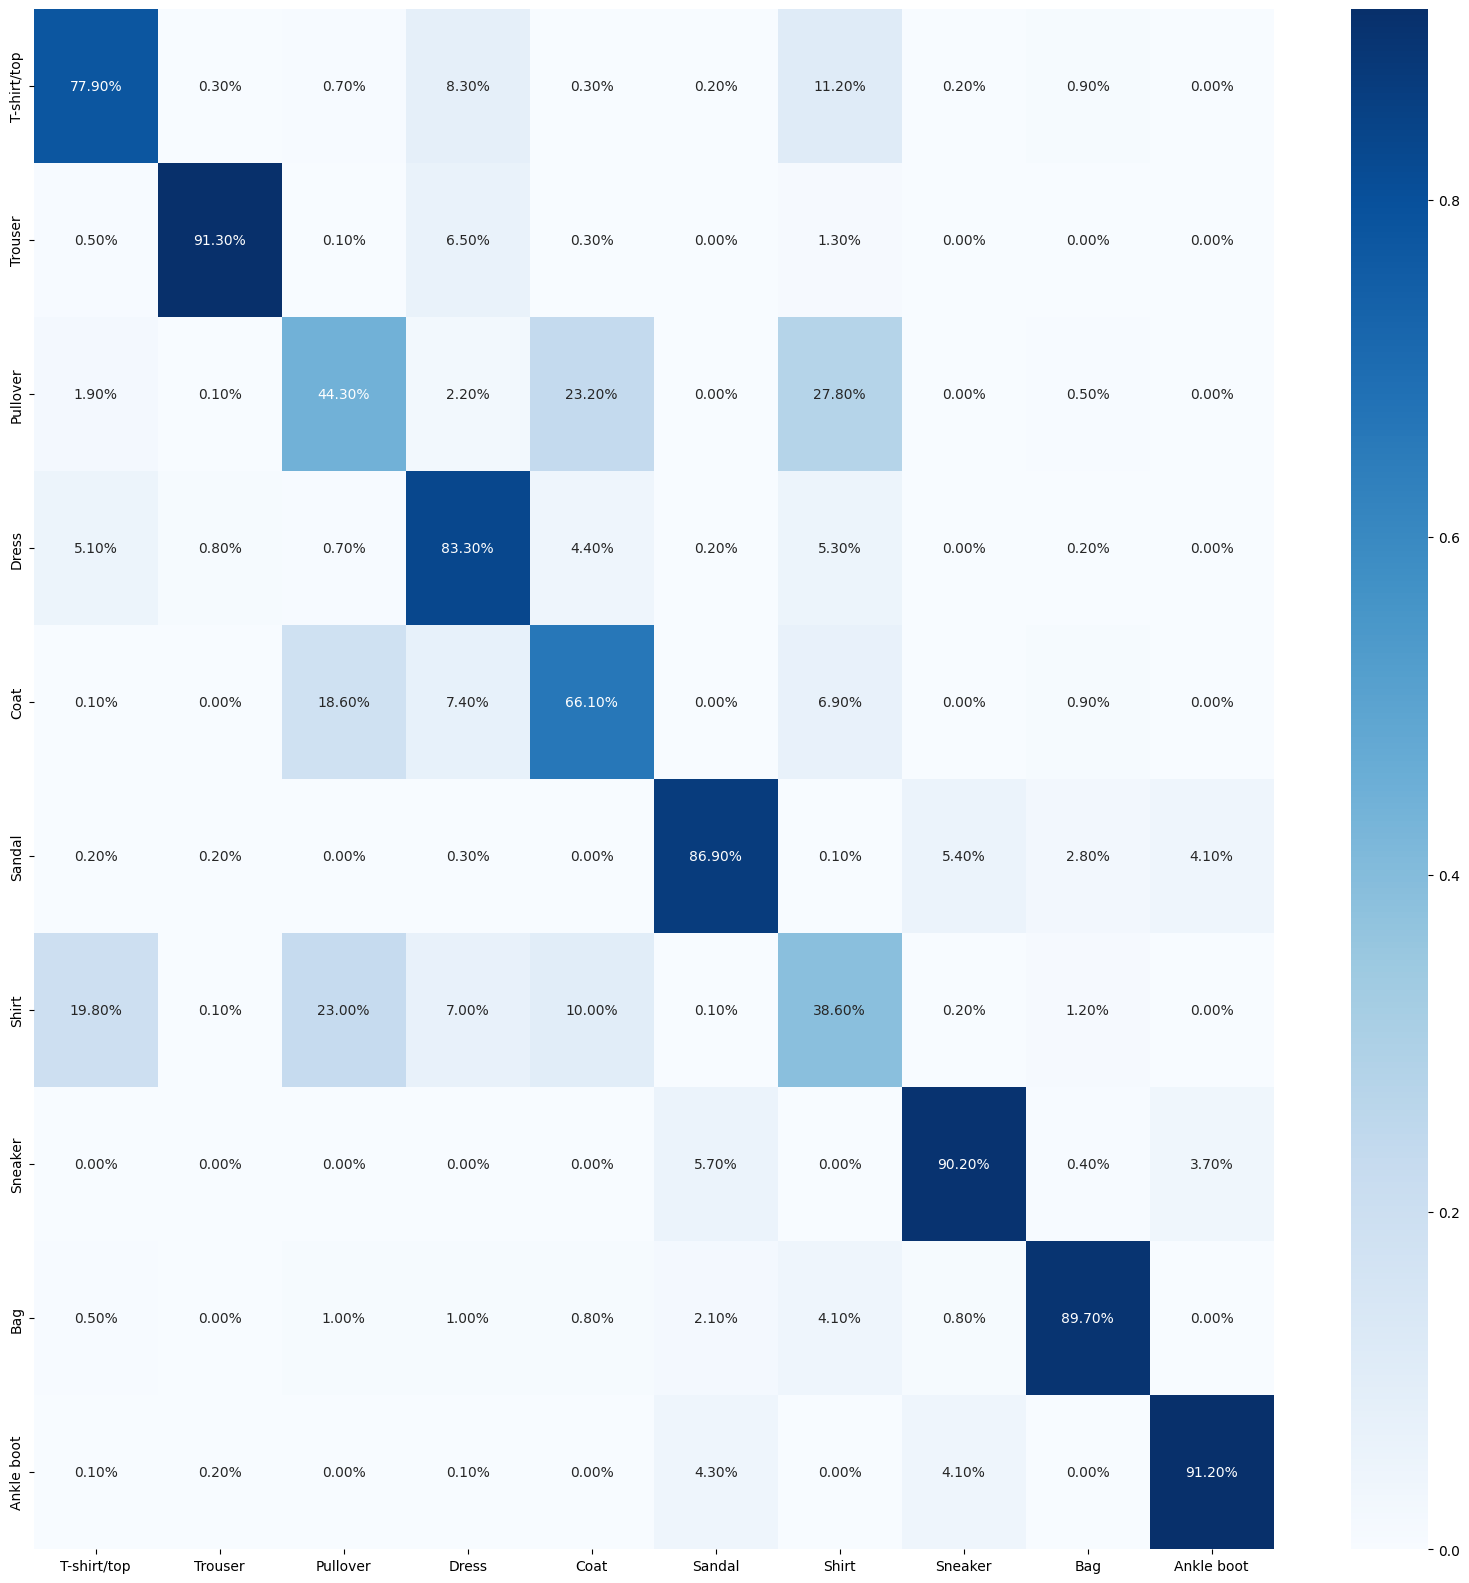

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]
# from this we can say max value un the outpuy array is the class label
y_preds = y_probs.argmax(axis=1)
cf_matrix = confusion_matrix(test_labels, y_preds)
plt.subplots(figsize=(20,20))
sns.heatmap(cf_matrix/np.sum(cf_matrix)*10, annot=True,
            fmt='.2%', cmap='Blues',yticklabels = class_names,xticklabels = class_names)



Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.

##***Convulational nueral network***

these are used for image processing

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")# r is the default value w is used if the zipfile is password protected
zip_ref.extractall()# this extracts all the data of the zipfile
zip_ref.close()# tClose the archive file. You must call close() before exiting your program or essential records will not be written.


--2023-11-11 21:00:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   143MB/s    in 0.7s    

2023-11-11 21:00:07 (143 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#!ls pizza_steak
#!ls pizza_steak/train/
#!ls pizza_steak/train/steak/
# ls is short for list
#all these shell commands and tells the data inside the directory
import os
#Python has a built-in os module with methods for interacting with the operating system, like creating files and directories, management of files and directories, input, output, environment variables, process management, etc.


# Walk through pizza_steak directory and list number of files
#for dirpath, dirnames, filenames in os.walk("pizza_steak"): #OS.walk() generate the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).
  #print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# there is one directory where there is no data
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train # much better way for specific selection
import pathlib# The pathlib module is part of Python’s standard library, and it helps you deal with all those challenges. It gathers the necessary functionality in one place and makes it available through methods and properties on a convenient Path object.
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
# * is wild card character suppose we want to find number of pizza images we use data_dir.glob('pizza/*')
print(class_names)


['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class # this should give the target image path string /content/pizza_steak/test + pizza

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)# random.sample returns random samples array from main dataset array
  # os.lisdir returns files path /content/pizza_steak/test/pizza


  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) # /content/pizza_steak/test/pizza/1001116.jpg like so hence the / is added
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


255

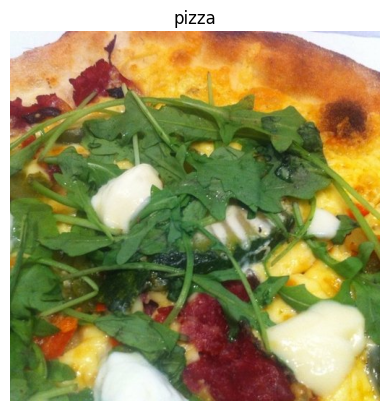

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza") # see only one result returns
img.shape # this returns pixels and color channels
img # sample image lets see how its stored
len(img[0][0]) # shape means (512,512,3) means  that there are 512 arrays containing 512 arrays with 3 elements most prolly rgb
# we should normalize the data now for this we find the max from any image
img.max()
#therefore we divide by 255


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)# this rescles by rescaling or diving 255
# the image data rescaler has many other hyperparameters link : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
#Deprecated: tf.keras.preprocessing.image.ImageDataGenerator is not recommended for new code. Prefer loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers.

valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, # this may also be used directory=r"./train/"
                                               batch_size=32, # number of images to process at a time default value
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on pizza or steak
                                               seed=42)# again standard value
#The directory must be set to the path where your ‘n’ classes of folders are present.
#The target_size is the size of your input images, every image will be resized to this size.
#color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
#batch_size: No. of images to be yielded from the generator per batch.
#class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
#shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
#seed: Random seed for applying random image augmentation and shuffling the order of the image.
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, # Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution). usually set to 32
                         kernel_size = (3,3), # can also be (3, 3) # here it means 10 filters applied to (3,3) subspace in image
                         strides = 1,
                         padding = "valid",
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  #Here we are learning a total of 10 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.
#As far as choosing the appropriate value for no. of filters, it is always recommended to use powers of 2 as the values.
  tf.keras.layers.Conv2D(10, (3,3), activation="relu"),
 #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.
  # simply it moves over the image pixel window by pixel window
# If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features.

  tf.keras.layers.MaxPool2D(pool_size=(2,2), # pool_size can also be (2, 2) window dimensions
                            padding="valid"), # padding can also be 'same' The padding parameter of the Keras Conv2D class can take one of two values: ‘valid’ or ‘same’.
#Setting the value to “valid” parameter means that the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.
  tf.keras.layers.Conv2D(10, (3,3), activation="relu"),
  tf.keras.layers.Conv2D(10, (3,3), activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),#Flattens the input. Does not affect the batch size. since analysis happened in batches it now one np array with all the data
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output ouput layer activation
])# change runtime to use gpu as its taking more than a minute for one epoch
# much faster clculations under 20 secs for one epoch

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # in one epoch it goes thrugh every image of a batch
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 118ms/step - loss: 0.5676 - accuracy: 0.7087 - val_loss: 0.4385 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4560 - accuracy: 0.8060 - val_loss: 0.3893 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4172 - accuracy: 0.8140 - val_loss: 0.3872 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3357 - accuracy: 0.8687 - val_loss: 0.4040 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2452 - accuracy: 0.9060 - val_loss: 0.4343 - val_accuracy: 0.8300


In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  # simpler model as max pool is not used
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 258ms/step - loss: 0.5951 - accuracy: 0.7047 - val_loss: 0.3749 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4086 - accuracy: 0.8207 - val_loss: 0.3786 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3225 - accuracy: 0.8660 - val_loss: 0.3478 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.1750 - accuracy: 0.9480 - val_loss: 0.3833 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.0714 - accuracy: 0.9820 - val_loss: 0.6063 - val_accuracy: 0.7620


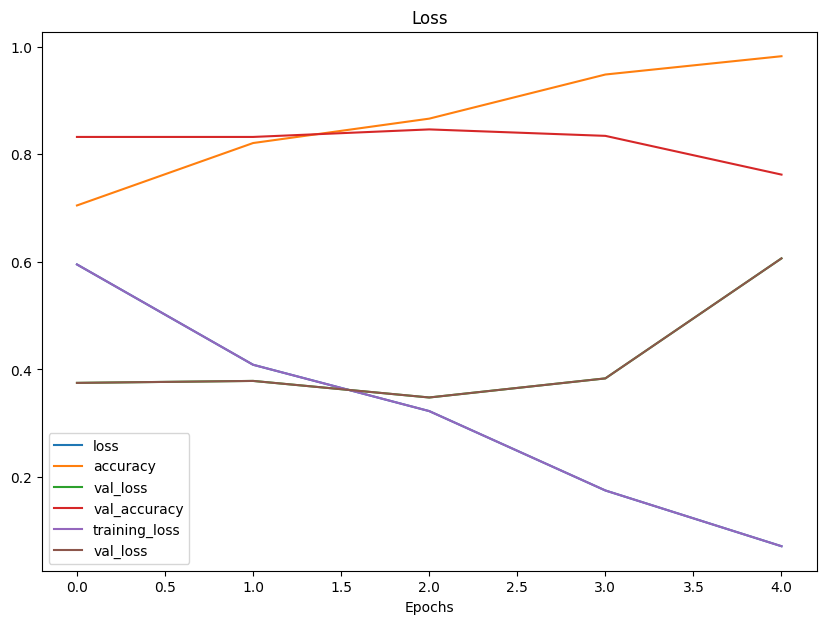

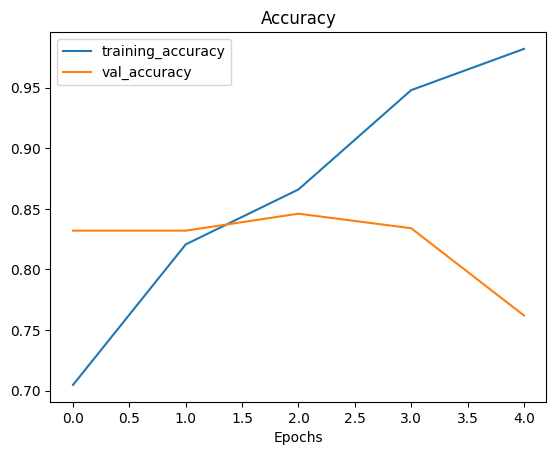

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
# Check out the loss curves of model_4
plot_loss_curves(history_4)



Fitting a machine learning model comes in 3 steps:
0. Create a basline.

1.Beat the baseline by overfitting a larger model.
2.Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

Increase the number of convolutional layers.
Increase the number of convolutional filters.
Add another dense layer to the output of our flattened layer.

In [ ]:
# now we use the max pool layer to decrease the overfitting
# so basically we repeat model_1
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
#It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

#The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

#The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).


Epoch 1/5
47/47 [==============================] - 12s 217ms/step - loss: 0.6065 - accuracy: 0.6673 - val_loss: 0.5079 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4657 - accuracy: 0.7947 - val_loss: 0.4109 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4170 - accuracy: 0.8200 - val_loss: 0.3686 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.3962 - accuracy: 0.8320 - val_loss: 0.3398 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3727 - accuracy: 0.8460 - val_loss: 0.4076 - val_accuracy: 0.8080


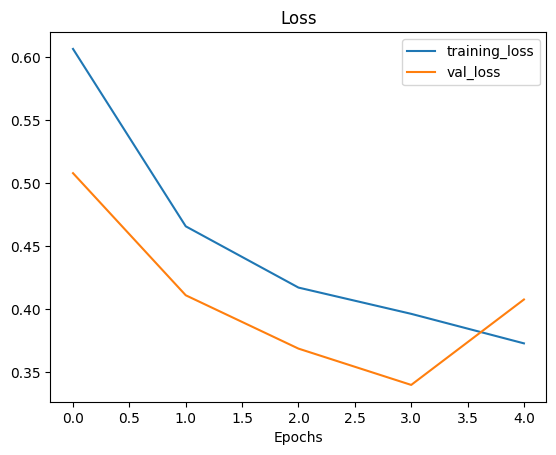

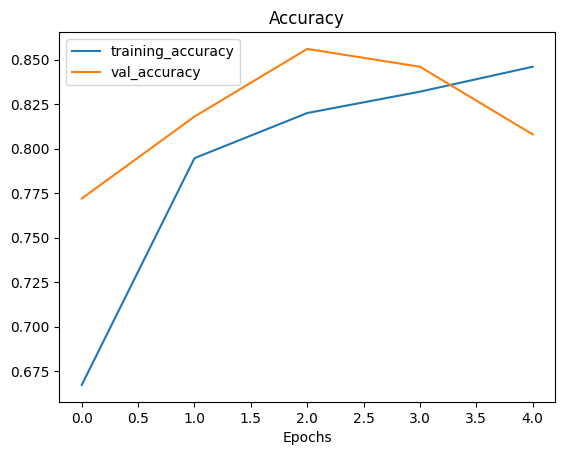

In [ ]:
plot_loss_curves(history_5)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 466ms/step - loss: 0.6318 - accuracy: 0.6607 - val_loss: 0.4499 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5344 - accuracy: 0.7440 - val_loss: 0.3964 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5313 - accuracy: 0.7487 - val_loss: 0.4850 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 35s 754ms/step - loss: 0.5067 - accuracy: 0.7593 - val_loss: 0.3837 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 31s 657ms/step - loss: 0.4999 - accuracy: 0.7747 - val_loss: 0.3763 - val_accuracy: 0.8380


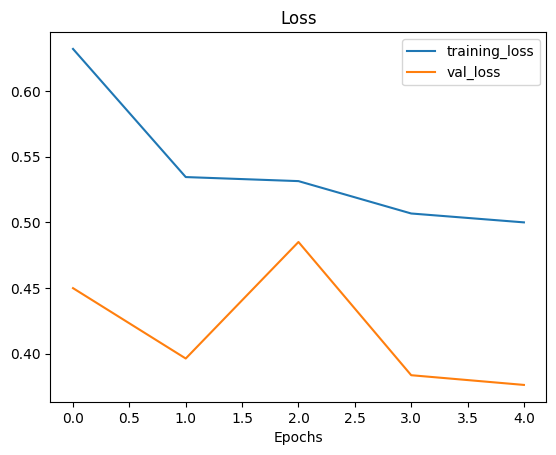

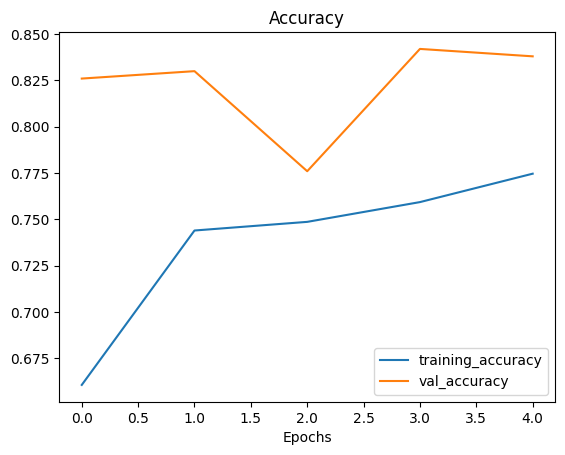

In [ ]:
print("Augmented training images:")

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True ) # Don't shuffle for demonstration purposes
# shuffle images for better results especially in binary classification

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))
plot_loss_curves(history_6)

# now fine tuning hyperparameters can be done

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  img = tf.expand_dims(steak, axis=0) # because we have to introduce batch size in input image format
  return img

# for predictions we convert model predictions to bnary predctions
pred_class = class_names[int(tf.round(pred)[0][0])]
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



NameError: ignored

https://towardsdatascience.com/how-to-remove-bias-in-machine-learning-training-data-d54967729f88

*** check the above link for highly biased data***


#***Multi class classifier***

we now analyse data for more than two classes

classifier should change to categorical
activation function changes to softmax


In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-11-14 19:57:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   222MB/s    in 2.2s    

2023-11-14 19:57:36 (222 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
""" we already know that image data needs to be augumented therefore we first augument the data """
# Create augmented data generator instance

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                   shuffle = True)
train_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_datagen = ImageDataGenerator(rescale=1/255.)
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# baseline model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 41s 125ms/step - loss: 2.1050 - accuracy: 0.2387 - val_loss: 1.9592 - val_accuracy: 0.3136
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.8638 - accuracy: 0.3540 - val_loss: 1.8433 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.5494 - accuracy: 0.4820 - val_loss: 1.8960 - val_accuracy: 0.3488
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.0666 - accuracy: 0.6489 - val_loss: 2.1577 - val_accuracy: 0.3348
Epoch 5/5
235/235 [==============================] - 29s 122ms/step - loss: 0.5554 - accuracy: 0.8240 - val_loss: 2.7076 - val_accuracy: 0.3160


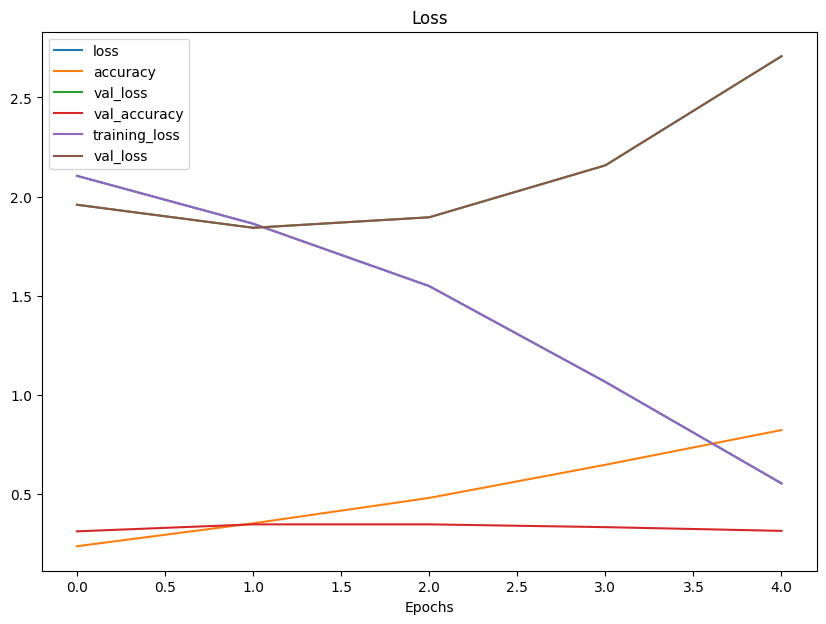

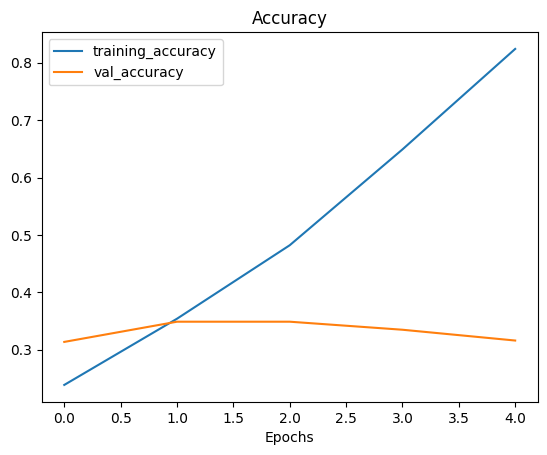

In [ ]:
import pandas as pd
pd.DataFrame(history_9.history).plot(figsize=(10, 7));
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history_9)

In [ ]:
# we see very less accuracy on the validation data
# therefore we simplyfy the data

model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


SyntaxError: ignored

Image shape: (512, 384, 3)


ValueError: ignored

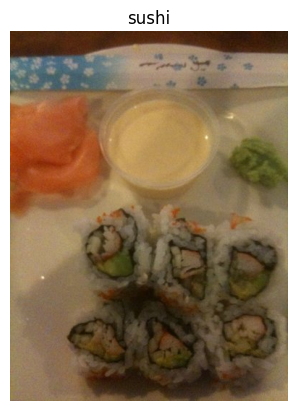

In [ ]:
"""

Since our model has a 'softmax' activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using argmax and then use that to index our class_names list to output the predicted class.

"""
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class # this should give the target image path string /content/pizza_steak/test + pizza

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)# random.sample returns random samples array from main dataset array
  # os.lisdir returns files path /content/pizza_steak/test/pizza


  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) # /content/pizza_steak/test/pizza/1001116.jpg like so hence the / is added
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  img = tf.expand_dims(steak, axis=0) # because we have to introduce batch size in input image format
  return img
pred = model_10.predict(tf.expand_dims(img, axis=0))
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
pred_and_plot(model_10, "03-steak.jpeg", class_names)
model_11.save("saved_trained_model")
# we get okay results


# Transfer leanring with TensorFlow Hub #
If you've been thinking, "surely someone else has spent the time crafting the right model for the job..." then you're in luck.

For many of the problems you'll want to use deep learning for, chances are, a working model already exists.

And the good news is, you can access many of them on **TensorFlow Hub**.

In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-15 08:54:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.9MB/s    in 8.6s    

2023-11-15 08:54:22 (18.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224) # if some label wriiten in caps then its parameters of some already made model architecture

BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


## Callbacks

Callbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include:

**Experiment tracking with TensorBoard** - log the performance of multiple models and then view and compare these models in a visual way on TensorBoard (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data.

**Model checkpointing** - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.

**Early stopping** - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.
We'll explore each of these overtime but for this notebook, we'll see how the TensorBoard callback can be used.

The TensorBoard callback can be accessed using tf.keras.callbacks.TensorBoard().

Its main functionality is saving a model's training performance metrics to a specified log_dir.

 By default, logs are recorded every epoch using the ***update_freq='epoch'*** parameter. This is a good default since tracking model performance too often can slow down model training.


In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback
"""
dir_name is the overall logs directory
experiment_name is the particular experiment
current_timestamp is the time the experiment started based on Python's datetime.datetime().now()

"""

"\ndir_name is the overall logs directory\nexperiment_name is the particular experiment\ncurrent_timestamp is the time the experiment started based on Python's datetime.datetime().now()\n\n"

# Creating models using TensorFlow Hub #

In the past we've used TensorFlow to create our own models layer by layer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from TensorFlow Hub.

In fact, we're going to use two models from TensorFlow Hub:

**ResNetV2** - a state of the art computer vision model architecture from 2016.
**EfficientNet** - a state of the art computer vision architecture from 2019.
State of the art means that at some point, both of these models have achieved the lowest error rate on ImageNet (ILSVRC-2012-CLS), the gold standard of computer vision benchmarks.

You might be wondering, how do you find these models on TensorFlow Hub?

Here are the steps I took:

Go to tfhub.dev.
Choose your problem domain, e.g. "Image" (we're using food images).

Select your TF version, which in our case is TF2.

Remove all "Problem domanin" filters except for the problem you're working on.

Note: "Image feature vector" can be used alongside almost any problem, we'll get to this soon.
The models listed are all models which could potentially be used for your problem.

🤔 Question: I see many options for image classification models, how do I know which is best?

You can see a list of state of the art models on ***paperswithcode.com***, a resource for collecting the latest in deep learning paper results which have code implementations for the findings they report.

To find our models, let's narrow down our search using the Architecture tab.

Select the Architecture tab on TensorFlow Hub and you'll see a dropdown menu of architecture names appear.
The rule of thumb here is generally, names with larger numbers means better performing models. For example, EfficientNetB4 performs better than EfficientNetB0.
However, the tradeoff with larger numbers can mean they take longer to compute.

Clicking the one titled "efficientnet/b0/feature-vector" brings us to a page with a button that says "Copy URL". That URL is what we can use to harness the power of EfficientNetB0.

Copying the URL should give you something like this: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1
🤔 Question: I thought we were doing image classification, why do we choose feature vector and not classification?

Great observation. This is where the differnet types of transfer learning come into play, as is, feature extraction and fine-tuning.

"As is" transfer learning is when you take a pretrained model as it is and apply it to your task without any changes.
For example, many computer vision models are pretrained on the ImageNet dataset which contains 1000 different classes of images. This means passing a single image to this model will produce 1000 different prediction probability values (1 for each class).

This is helpful if you have 1000 classes of image you'd like to classify and they're all the same as the ImageNet classes, however, it's not helpful if you want to classify only a small subset of classes (such as 10 different kinds of food). Model's with "/classification" in their name on TensorFlow Hub provide this kind of functionality.
Feature extraction transfer learning is when you take the underlying patterns (also called weights) a pretrained model has learned and adjust its outputs to be more suited to your problem.
For example, say the pretrained model you were using had 236 different layers (EfficientNetB0 has 236 layers), but the top layer outputs 1000 classes because it was pretrained on ImageNet. To adjust this to your own problem, you might remove the original activation layer and replace it with your own but with the right number of output classes. The important part here is that only the top few layers become trainable, the rest remain frozen.

This way all the underlying patterns remain in the rest of the layers and you can utilise them for your own problem. This kind of transfer learning is very helpful when your data is similar to the data a model has been pretrained on.
Fine-tuning transfer learning is when you take the underlying patterns (also called weights) of a pretrained model and adjust (fine-tune) them to your own problem.

This usually means training some, many or all of the layers in the pretrained model. This is useful when you've got a large dataset (e.g. 100+ images per class) where your data is slightly different to the data the original model was trained on.
A common workflow is to "freeze" all of the learned patterns in the bottom layers of a pretrained model so they're untrainable. And then train the top 2-3 layers of so the pretrained model can adjust its outputs to your custom data (feature extraction).

After you've trained the top 2-3 layers, you can then gradually "unfreeze" more and more layers and run the training process on your own data to further fine-tune the pretrained model.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer
  ])

  return model

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")])
# we get good results

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20231115-085500
Epoch 1/5
24/24 [==============================] - 25s 560ms/step - loss: 2.0517 - accuracy: 0.3013 - val_loss: 1.2223 - val_accuracy: 0.6280
Epoch 2/5
24/24 [==============================] - 13s 549ms/step - loss: 0.9023 - accuracy: 0.7120 - val_loss: 0.8715 - val_accuracy: 0.7308
Epoch 3/5
24/24 [==============================] - 11s 470ms/step - loss: 0.6071 - accuracy: 0.8240 - val_loss: 0.7607 - val_accuracy: 0.7564
Epoch 4/5
24/24 [==============================] - 11s 484ms/step - loss: 0.4636 - accuracy: 0.8747 - val_loss: 0.7090 - val_accuracy: 0.7660
Epoch 5/5
24/24 [==============================] - 11s 491ms/step - loss: 0.3756 - accuracy: 0.9120 - val_loss: 0.6750 - val_accuracy: 0.7764


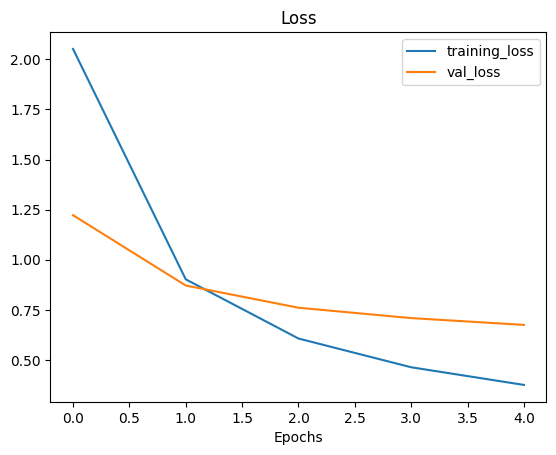

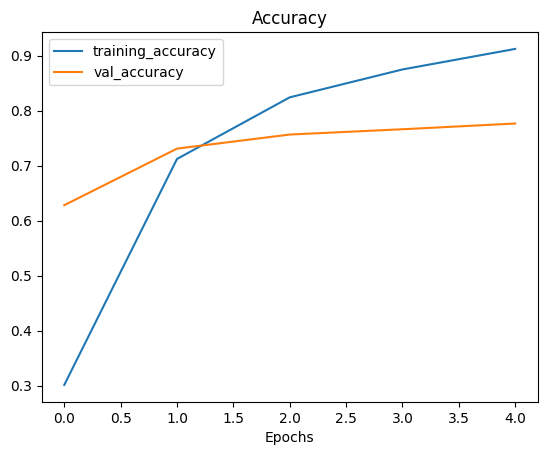

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(resnet_history)

In [ ]:
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnet")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet/20231115-090216
Epoch 1/5
24/24 [==============================] - 24s 575ms/step - loss: 1.7003 - accuracy: 0.5520 - val_loss: 1.1906 - val_accuracy: 0.7648
Epoch 2/5
24/24 [==============================] - 10s 411ms/step - loss: 0.9848 - accuracy: 0.7987 - val_loss: 0.8210 - val_accuracy: 0.8192
Epoch 3/5
24/24 [==============================] - 11s 480ms/step - loss: 0.7152 - accuracy: 0.8400 - val_loss: 0.6698 - val_accuracy: 0.8460
Epoch 4/5
24/24 [==============================] - 11s 461ms/step - loss: 0.5785 - accuracy: 0.8800 - val_loss: 0.5943 - val_accuracy: 0.8520
Epoch 5/5
24/24 [==============================] - 11s 465ms/step - loss: 0.4910 - accuracy: 0.8973 - val_loss: 0.5438 - val_accuracy: 0.8632


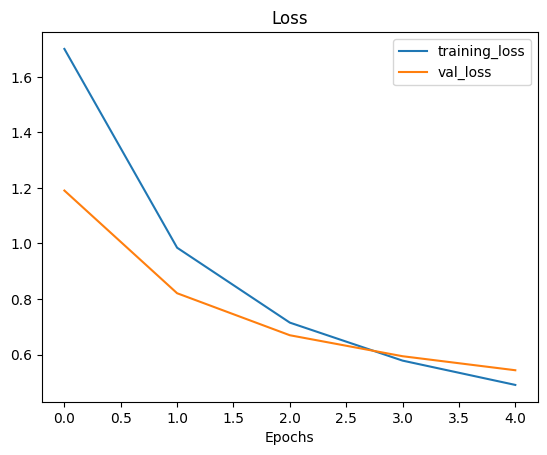

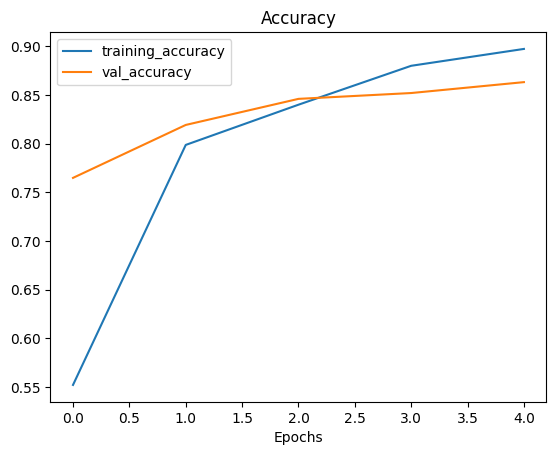

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
"""

--logdir is the target upload directory
--name is the name of the experiment
--description is a brief description of the experiment
--one_shot exits the TensorBoard uploader once uploading is finished

# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

tensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID]

"""




'\n\n--logdir is the target upload directory\n--name is the name of the experiment\n--description is a brief description of the experiment\n--one_shot exits the TensorBoard uploader once uploading is finished\n\n# Upload TensorBoard dev records\n!tensorboard dev upload --logdir ./tensorflow_hub/   --name "EfficientNetB0 vs. ResNet50V2"   --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images"   --one_shot\n     \ntensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID]\n\n'

Introduce fine-tuning, a type of transfer learning to modify a pre-trained model to be more suited to your data
Using the Keras Functional API (a differnt way to build models in Keras)


Using a smaller dataset to experiment faster (e.g. 1-10% of




training samples of 10 classes of food)




Data augmentation (how to make your training dataset more diverse without adding more data)




Running a series of modelling experiments on our Food Vision data

Model 0: a transfer learning model using the Keras Functional API

Model 1: a feature extraction transfer learning model on 1% of the data with data augmentation

Model 2: a feature extraction transfer learning model on 10% of the data with data augmentation

Model 3: a fine-tuned transfer learning model on 10% of the data

Model 4: a fine-tuned transfer learning model on 100% of the data

Introduce the ModelCheckpoint callback to save intermediate training results

Compare model experiments results using TensorBoard





In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")


Notebook last run (end-to-end): 2023-11-15 19:26:18.556294


In [ ]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.12.0


In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


--2023-11-15 19:26:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-15 19:26:05 (46.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-11-15 19:26:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.207, 74.125.126.207, 142.251.172.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   129MB/s    in 1.2s    

2023-11-15 19:26:23 (129 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent.class_names


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

""" # This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

"""

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_food_classes_10_percent")])

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_food_classes_10_percent/20231115-192638
Epoch 1/5
24/24 [==============================] - 115s 4s/step - loss: 1.9340 - accuracy: 0.4013 - val_loss: 1.3548 - val_accuracy: 0.7089
Epoch 2/5
24/24 [==============================] - 91s 4s/step - loss: 1.1698 - accuracy: 0.7480 - val_loss: 0.9090 - val_accuracy: 0.8043
Epoch 3/5
24/24 [==============================] - 89s 4s/step - loss: 0.8471 - accuracy: 0.8160 - val_loss: 0.7160 - val_accuracy: 0.8454
Epoch 4/5
24/24 [==============================] - 129s 6s/step - loss: 0.6990 - accuracy: 0.8520 - val_loss: 0.6405 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 88s 4s/step - loss: 0.5949 - accuracy: 0.8520 - val_loss: 0.5564 - val_accuracy: 0.8684


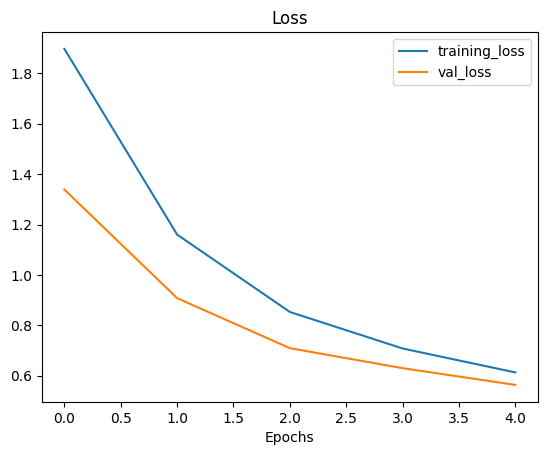

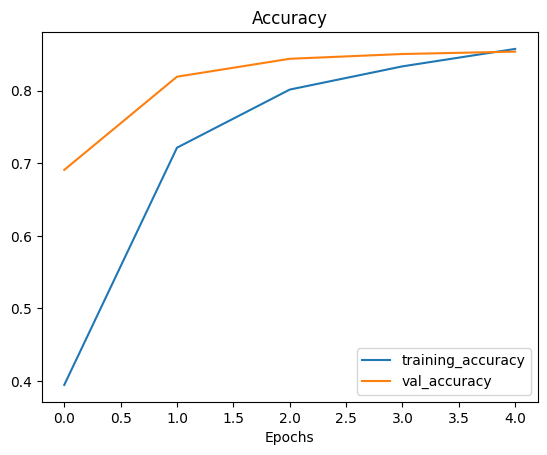

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-11-15 19:36:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.207, 108.177.120.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   204MB/s    in 0.6s    

2023-11-15 19:36:41 (204 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32, # default
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

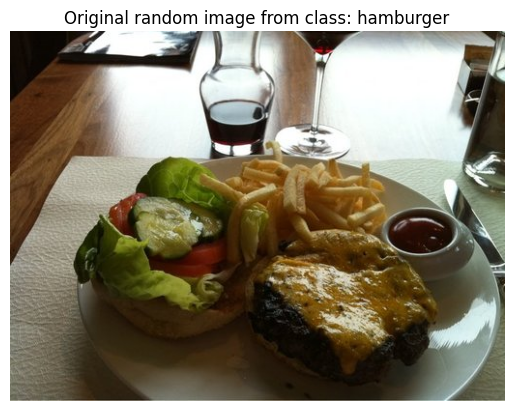

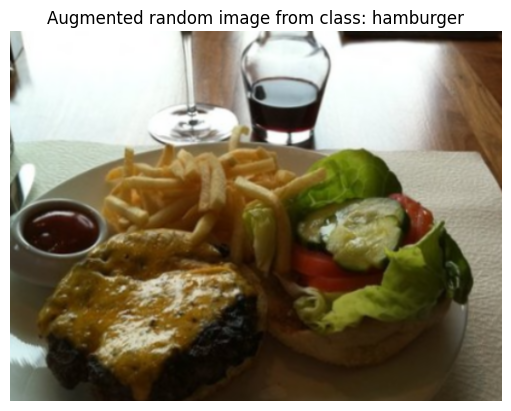

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20231115-193651
Epoch 1/5
3/3 [==============================] - 66s 24s/step - loss: 2.3342 - accuracy: 0.0714 - val_loss: 2.2782 - val_accuracy: 0.1447
Epoch 2/5
3/3 [==============================] - 89s 42s/step - loss: 2.1432 - accuracy: 0.2143 - val_loss: 2.1832 - val_accuracy: 0.2072
Epoch 3/5
3/3 [==============================] - 46s 22s/step - loss: 1.9981 - accuracy: 0.3429 - val_loss: 2.0837 - val_accuracy: 0.2533
Epoch 4/5
3/3 [==============================] - 88s 42s/step - loss: 1.7903 - accuracy: 0.4286 - val_loss: 1.9974 - val_accuracy: 0.3010
Epoch 5/5
3/3 [==============================] - 86s 42s/step - loss: 1.7343 - accuracy: 0.5571 - val_loss: 1.9204 - val_accuracy: 0.3421


In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
 #Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Note: the test data is the same as the previous experiment, we could
# skip creating this, but we'll leave this here to practice.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_2 = create_base_model()

In [ ]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231115-195113
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0039 - accuracy: 0.3440
Epoch 1: val_loss improved from inf to 1.48489, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 111s 4s/step - loss: 2.0039 - accuracy: 0.3440 - val_loss: 1.4849 - val_accuracy: 0.6398
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3837 - accuracy: 0.6520
Epoch 2: val_loss improved from 1.48489 to 1.05362, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 108s 5s/step - loss: 1.3837 - accuracy: 0.6520 - val_loss: 1.0536 - val_accuracy: 0.7451
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1052 - accuracy: 0.7400
Epoch 3: val_loss improved from 1.05362 to 0.85458, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=====

In [ ]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 195s 2s/step - loss: 0.6460 - accuracy: 0.8284


In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug == loaded_weights_model_results
# RESULTS ARE NOT EXACTLY SAME


79/79 [==============================] - 6s 64ms/step - loss: 0.6485 - accuracy: 0.8344


False

In [ ]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
# Check the difference between the two results (small values)
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))


[5.96046448e-08 0.00000000e+00]


In [ ]:
# Layers in loaded model
# now we wnt to unfreeze top layers that neat output
model_2.layers

In [ ]:
model_2.summary()# only output layer is trainable


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
# Make all the layers in model_2_base_model trainable
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

In [ ]:
# Create a new instance of model_2 for Experiment 4
model_2 = create_base_model(learning_rate=0.0001) # 10x lower learning rate for fine-tuning
# Load previously checkpointed weights
model_2.load_weights(checkpoint_path)
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)
# Unfreeze the top 10 layers in model_2's base_model
model_2_base_model = model_2.layers[2] # layers[2] as the efficient net layer is frozen hence we unfreeze it.
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

In [ ]:
"""

# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./transfer_learning \
#   --name "Transfer learning experiments" \
#   --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
#   --one_shot # exits the uploader when upload has finished

# View previous experiments
# !tensorboard dev list

# Remove previous experiments
# !tensorboard dev delete --experiment_id OUbW0O3pRqqQgAphVBxi8Q
"""


Refer to scaling up notebook in course its nothing new
1. heatmap is made use seaborn code for that
2. most wrong predictions are checked like apple pie. possible reasons ground lablel was wrong
3.functions were made display most wrong classes
4. f1- score analysis should be used to fing most wrongly predicted class.
5. data was unbathched.
